## Online News Popularity Prediction Portfolio

## Chitra Paryani 
### NUID - 001869343

## Github link for Project

https://github.com/chitraparyani/Machine-Learning

### License for code in this document

MIT License

Copyright (c) 2018 Chitra Ramchand Paryani

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

### License for text in this document

MIT License
Copyright (c) 2018 Chitra Ramchand Paryani

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Licensing 

###https://github.com/chitraparyani/Machine-Learning/blob/master/LICENSE
###https://github.com/chitraparyani/Machine-Learning/

### Abstract

#### The significant numbers of articles are published using online platform like Medium, Facebook, NYTimes, etc. These platforms also give us an opportunity to share them in various social platforms like Facebook, twitter, LinkedIn, Reddit, Google+, etc. When these articles are shared by enormous number of people, articles become more popular as compared by those articles which are not shared.

#### In this project, I am analyzing articles popularity using target variable - shares which indicated number of times that article is shared. This can help online news companies who can check popularity of article before publishing it. Also, it can help businesses which rely heavily on social networks to grow and flourish their business.

#### I am viewing this problem as classification problem and applied various algorithms like logistic regression, Random Forest, SVM, Naïve Bayes, and Neural Network. Additionally, I have also applied regularization, hyper-parameter tuning, and cross-validation technique. Highest accuracy is achieved using Random Forest algorithm which is 68%

### Introduction

#### I am using Online News Popularity dataset from UCI Machine Learning Repository to predict Online News Popularity. The dataset consists of 39644 records and 61 attributes from which 2 are non-predictive attributes, 58 are predictive attributes and 1 is target variable which is Number of shares.

#### Dataset is provided by Mashable which is a global social news company. Dataset provides statistical summary of the articles instead of original articles. However, dataset consist of one non-predictive attribute – URL which consist of link to article and can be used for sentiment analysis in future.

#### Dataset contains target variable, shares which is a continuous output value ranging from 1 to 843300. To convert this problem into classification, I have used shares variable’s median value 1400 and converted it to binary values 0 and 1 which has divided the dataset into two equal parts.

### Importing libraries

In [5]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn import grid_search
from sklearn import cross_validation
from sklearn import metrics
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

### Importing Dataset

In [6]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
data = pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
data.head()
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### Exploratory Data Analysis

#### I have used various ways to analyze data as shown below. As well, I also analyzed data manually for checking anamolies

#### As we can see below, dataset is having 61 attributes and 39644 instances of data

In [7]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
data.shape
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

(39644, 61)

#### Info method provides data type of the attributes as well as information if any record contains null value

#### As we can see below, no null records exist in the dataset

In [6]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
data.info()
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

#### Describing statistical summary of the dataset

In [7]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
data.describe()
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


#### Information Value Summary - Showing features which are most Important

In [8]:
rfc = RandomForestClassifier()

In [9]:
X_rfc = data.iloc[:,2:60]
Y_rfc = data.iloc[:, -1]

In [10]:
rfc.fit(X_rfc,Y_rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
importance = rfc.feature_importances_

In [12]:
sorted_importances = np.argsort(importance)

In [13]:
print("Feature ranking:")
for f in range(X_rfc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, sorted_importances[f], importance[sorted_importances[f]]))

Feature ranking:
1. feature 3 (0.000132)
2. feature 14 (0.001847)
3. feature 16 (0.001953)
4. feature 11 (0.002249)
5. feature 12 (0.002335)
6. feature 15 (0.002338)
7. feature 35 (0.002656)
8. feature 34 (0.002684)
9. feature 13 (0.002729)
10. feature 36 (0.003587)
11. feature 29 (0.005093)
12. feature 33 (0.005152)
13. feature 32 (0.005312)
14. feature 31 (0.005442)
15. feature 30 (0.005731)
16. feature 17 (0.007099)
17. feature 21 (0.007504)
18. feature 8 (0.011020)
19. feature 10 (0.013427)
20. feature 50 (0.014398)
21. feature 56 (0.014794)
22. feature 57 (0.014818)
23. feature 54 (0.015585)
24. feature 49 (0.015715)
25. feature 7 (0.015737)
26. feature 6 (0.016886)
27. feature 55 (0.017730)
28. feature 52 (0.018010)
29. feature 53 (0.018171)
30. feature 20 (0.018513)
31. feature 23 (0.019895)
32. feature 27 (0.021283)
33. feature 0 (0.021783)
34. feature 26 (0.021991)
35. feature 5 (0.022414)
36. feature 28 (0.022487)
37. feature 46 (0.023325)
38. feature 47 (0.023469)
39. featur

In [14]:
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 100), rfc.feature_importances_), data), reverse=True))

Features sorted by their score:
[(0.029539719510751104, ' kw_min_avg'), (0.029526674986662994, ' kw_avg_max'), (0.029160628741429783, ' kw_min_max'), (0.02879247094316238, ' is_weekend'), (0.028741649609293284, ' kw_min_min'), (0.028451963672140815, ' num_imgs'), (0.028313189331398758, ' weekday_is_sunday'), (0.028089640579248516, ' LDA_01'), (0.027970479547495996, ' data_channel_is_world'), (0.027899358141775212, ' global_subjectivity'), (0.027649845961086893, ' LDA_02'), (0.027423500769308183, ' LDA_03'), (0.027310139209417605, ' rate_positive_words'), (0.027211805318505256, ' n_unique_tokens'), (0.02714060811111833, ' n_tokens_title'), (0.02695691420524039, ' LDA_00'), (0.02689134659094906, ' LDA_04'), (0.026584586177597003, ' timedelta'), (0.025704139008755816, ' global_sentiment_polarity'), (0.02534933629555139, ' min_positive_polarity'), (0.02346919946937458, ' global_rate_negative_words'), (0.0233247647034134, ' global_rate_positive_words'), (0.022486548657382463, ' self_referen

#### Plot the data

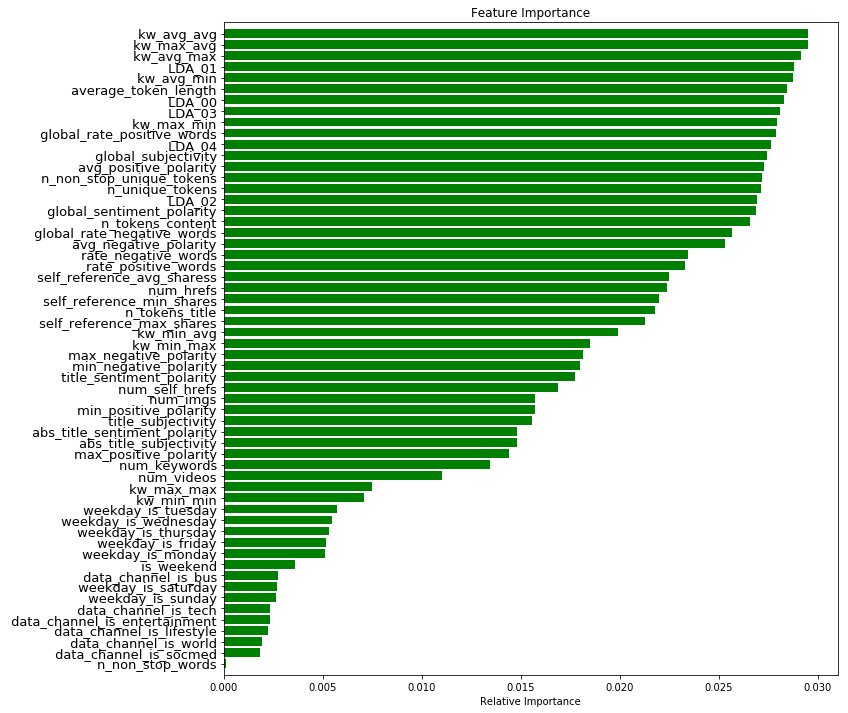

In [15]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
from pylab import rcParams
rcParams['figure.figsize']=11,12
#plt.barh(range([X_rfc.shape[1]), importance[sorted_importances], align='center')
plt.barh(range(X_rfc.shape[1]), importance[sorted_importances], color="g", align="center")
# Customize the plot
plt.yticks(range(X_rfc.shape[1]), X_rfc.columns[sorted_importances], fontsize=13)
plt.xlabel("Relative Importance")
plt.ylim([-1, X_rfc.shape[1]])
plt.title("Feature Importance")
plt.show()
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

#### Checking for Missing Values

In [16]:
data.isnull().astype(bool).sum()

url                               0
 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                 

#### Checking for missing values indicated as zero --> We can see below there are 2581 instances of data encoded as zero for attributes rate of positive words and rate of negative words

In [8]:
rate_pos_neg_words = data[data[' rate_positive_words'] == 0] + data[data[' rate_negative_words'] == 0]

In [9]:
rate_pos_neg_words.shape

(2581, 61)

#### Average token length attribute also contains zero values as indicated below

In [10]:
avg_token_len = data[data[' average_token_length'] == 0]

In [11]:
avg_token_len.shape

(1181, 61)

### Co-relation between the data

In [21]:
data.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


#### Generating HeatMap and checking co-relation between the data

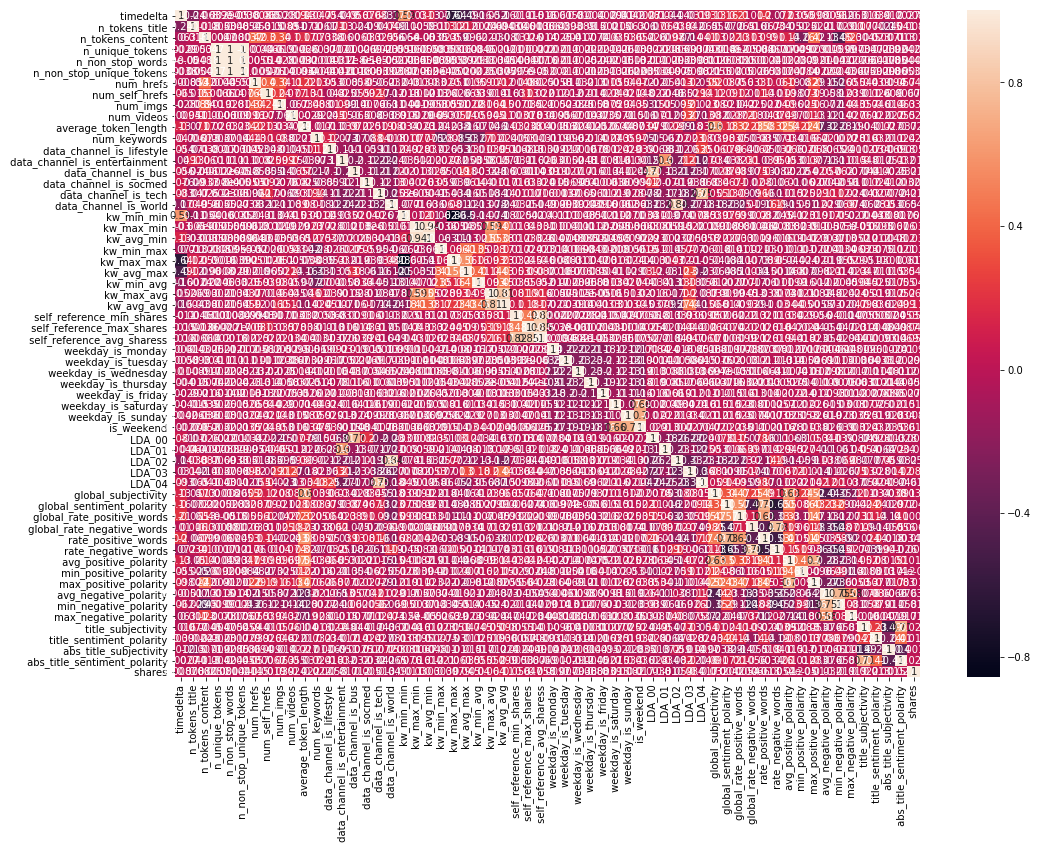

In [22]:
a4_dims = (16.7, 12.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(data.corr(), annot=True)

### Outliers

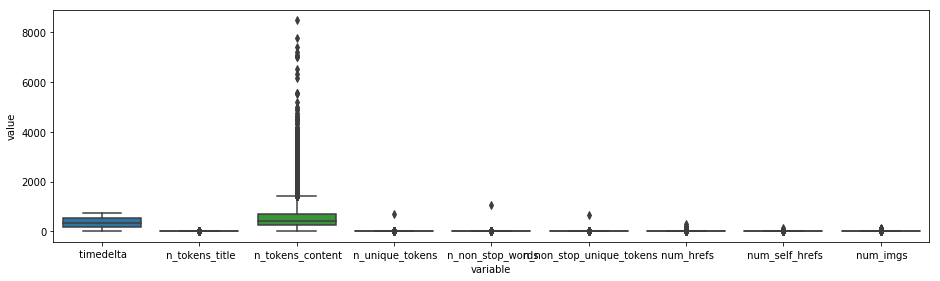

In [23]:
a4_dims = (15.7, 4.27)
fig, ax = plt.subplots(figsize=a4_dims, sharex=True, sharey=True)
df = pd.DataFrame(data = data.iloc[:,1:10])
sns.boxplot(x="variable", y = "value", data=pd.melt(df))
plt.show()

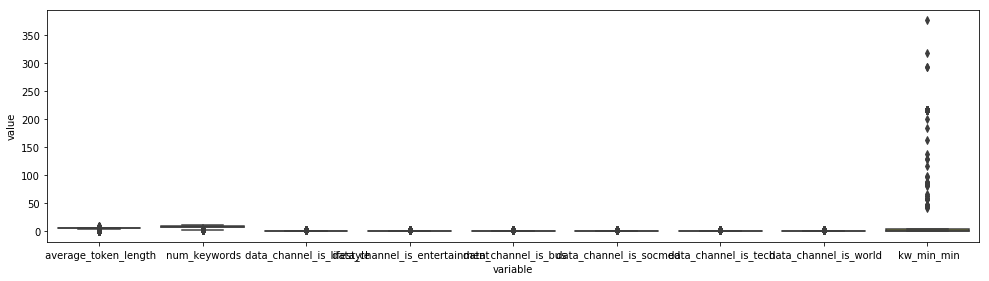

In [24]:
a4_dims = (16.7, 4.27)
fig, ax = plt.subplots(figsize=a4_dims, sharex=True, sharey=True)
df = pd.DataFrame(data = data.iloc[:,11:20])
sns.boxplot(x="variable", y = "value", data=pd.melt(df))
plt.show()

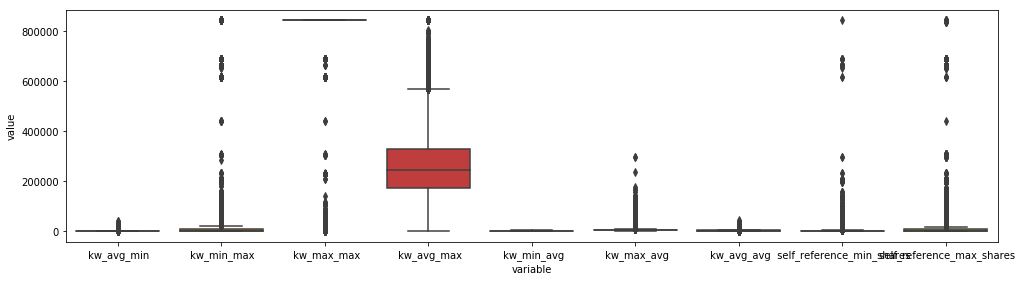

In [25]:
a4_dims = (16.7, 4.27)
fig, ax = plt.subplots(figsize=a4_dims, sharex=True, sharey=True)
df = pd.DataFrame(data = data.iloc[:,21:30])
sns.boxplot(x="variable", y = "value", data=pd.melt(df))
plt.show()

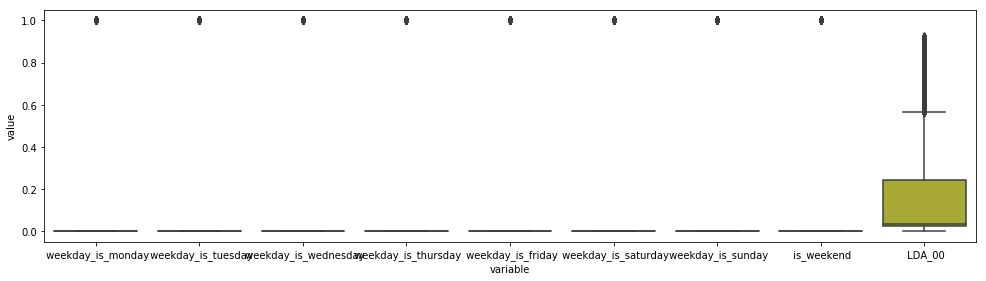

In [26]:
a4_dims = (16.7, 4.27)
fig, ax = plt.subplots(figsize=a4_dims, sharex=True, sharey=True)
df = pd.DataFrame(data = data.iloc[:,31:40])
sns.boxplot(x="variable", y = "value", data=pd.melt(df))
plt.show()

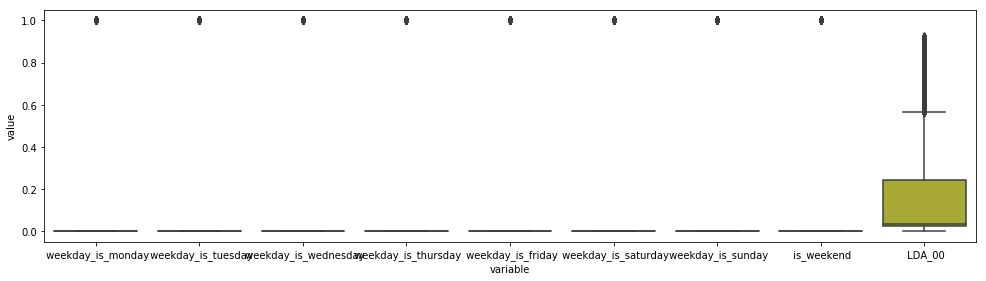

In [27]:
a4_dims = (16.7, 4.27)
fig, ax = plt.subplots(figsize=a4_dims, sharex=True, sharey=True)
df = pd.DataFrame(data = data.iloc[:,31:40])
sns.boxplot(x="variable", y = "value", data=pd.melt(df))
plt.show()

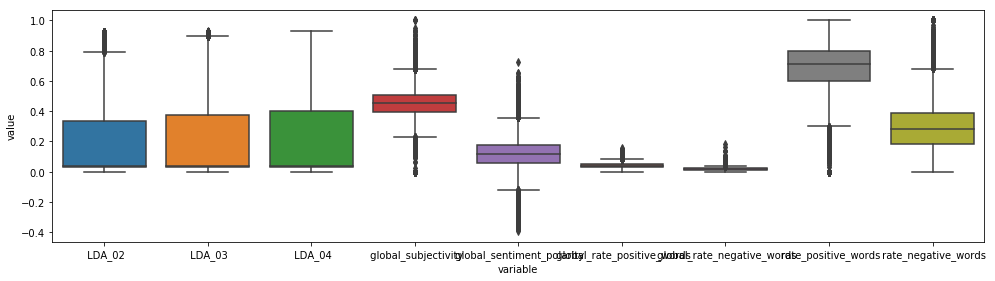

In [28]:
a4_dims = (16.7, 4.27)
fig, ax = plt.subplots(figsize=a4_dims, sharex=True, sharey=True)
df = pd.DataFrame(data = data.iloc[:,41:50])
sns.boxplot(x="variable", y = "value", data=pd.melt(df))
plt.show()

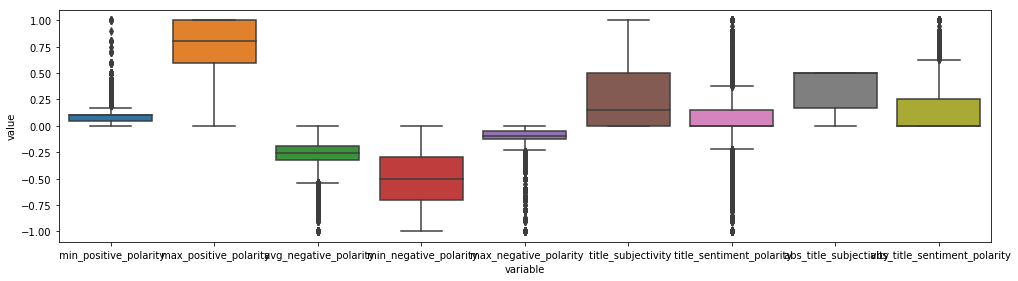

In [29]:
a4_dims = (16.7, 4.27)
fig, ax = plt.subplots(figsize=a4_dims, sharex=True, sharey=True)
df = pd.DataFrame(data = data.iloc[:,51:60])
sns.boxplot(x="variable", y = "value", data=pd.melt(df))
plt.show()

#### As we can see in above boxplots, it contains outliers in many columns n_tokens_content, kv_min_min, so on and so forth. I will remove and clean all anomalies while performing data clean up

### Histogram for each column in the dataset

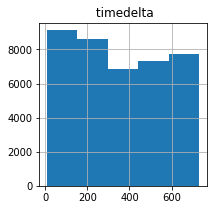

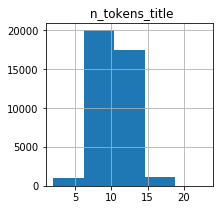

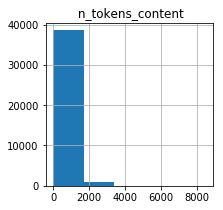

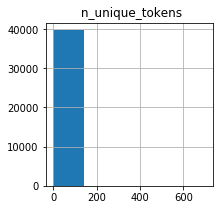

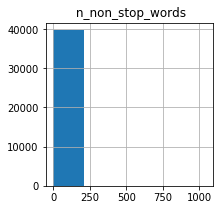

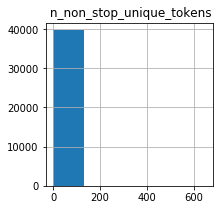

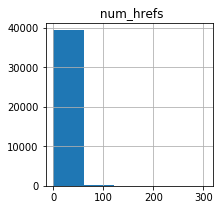

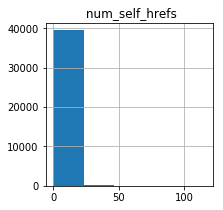

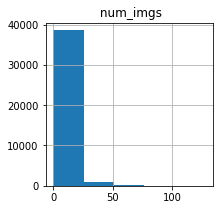

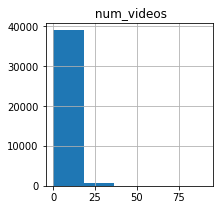

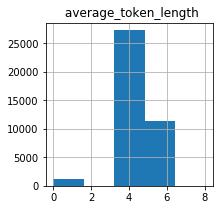

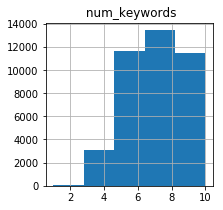

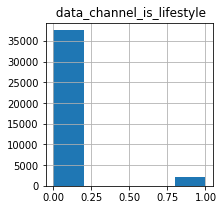

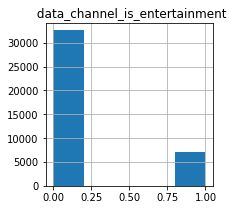

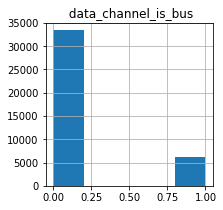

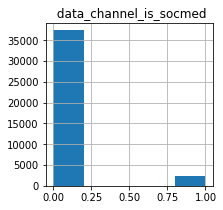

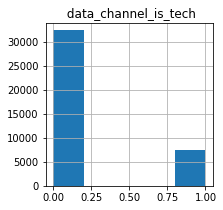

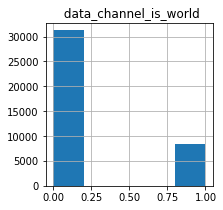

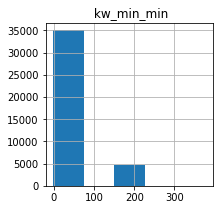

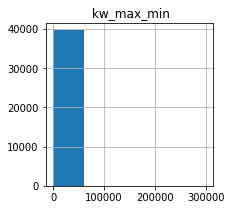

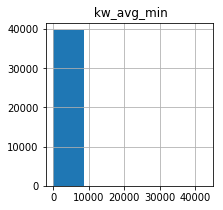

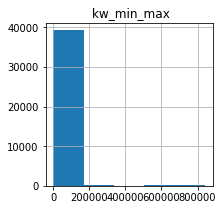

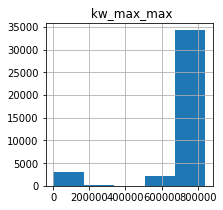

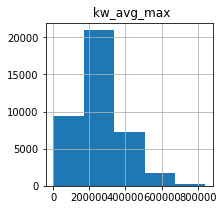

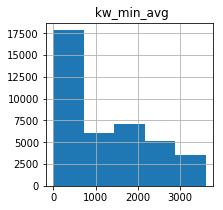

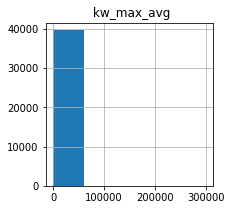

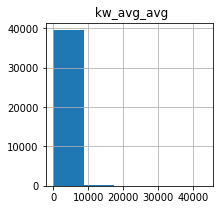

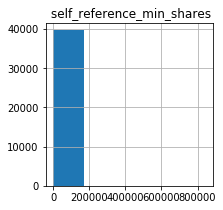

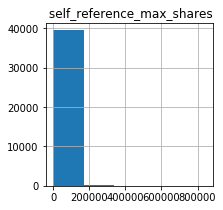

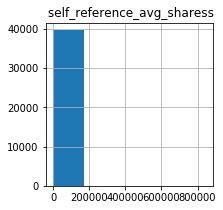

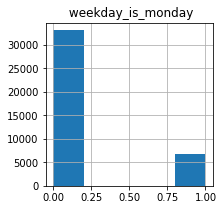

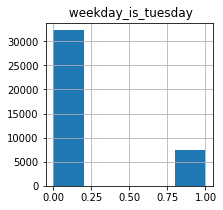

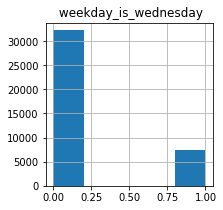

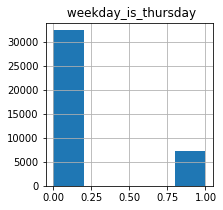

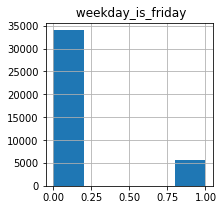

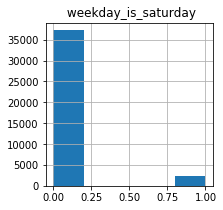

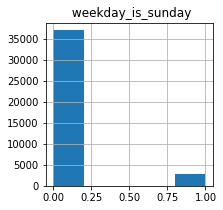

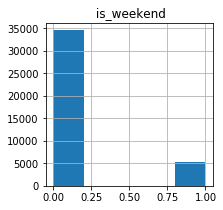

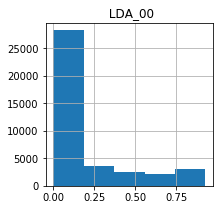

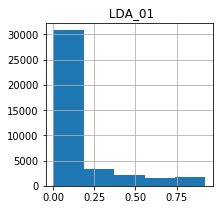

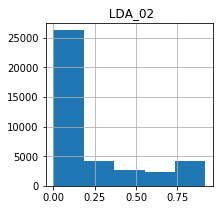

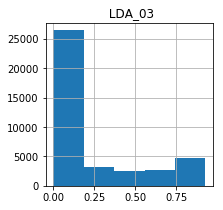

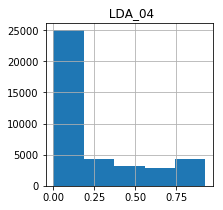

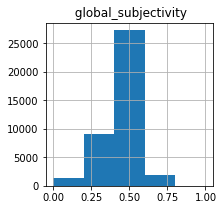

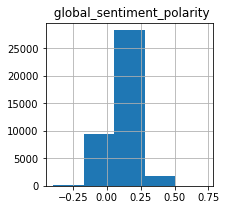

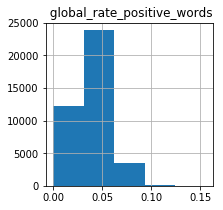

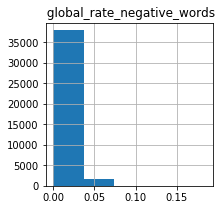

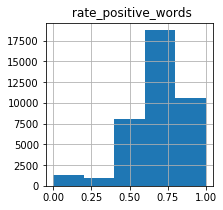

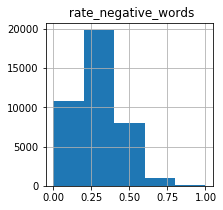

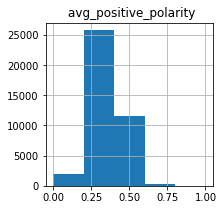

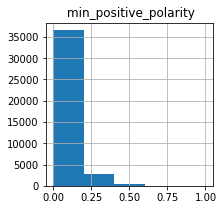

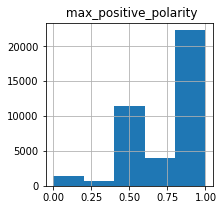

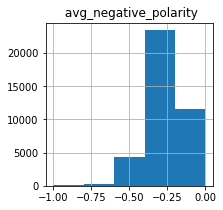

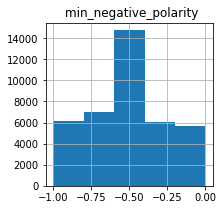

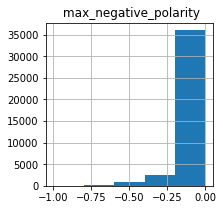

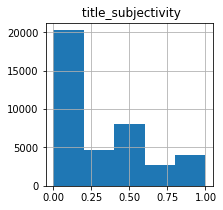

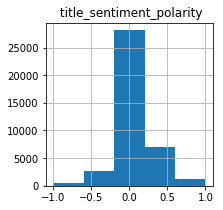

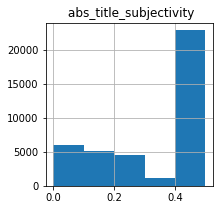

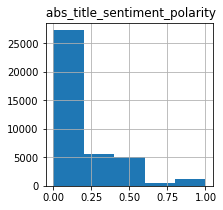

In [30]:
for i in data.iloc[:3,1:60]:
    data.hist(i, sharex=True, sharey=True, bins=5, figsize=(3,3))

#### Found zero values in rate_positive_words, rate_negative_words which I will remove while doing data clean up

### Data Distribution

#### Converting target attribute --> shares into binary to perform logistic regression

In [31]:
# Checking median of our target variable

In [12]:
data[' shares'].median()

1400.0

In [13]:
# Creating a funtion to convert target variable into binary based on median value

In [14]:
def converter(x):
    if(x > 1400):
        return 1
    else:
        return 0

In [15]:
data['NumberOfShares'] = data[' shares'].apply(converter)

#### we can see below, data is distributed almost equally using median value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5924A5400>,
      dtype=object)

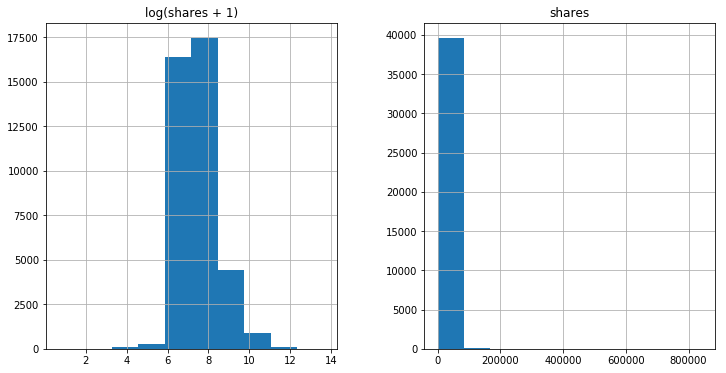

In [36]:
plt.rcParams['figure.figsize'] = 12,6
shares = pd.DataFrame({"shares":data[' shares'], "log(shares + 1)":np.log1p(data[' shares'])    
})
shares.hist()

Text(0.5,0,'Discret Value Output')

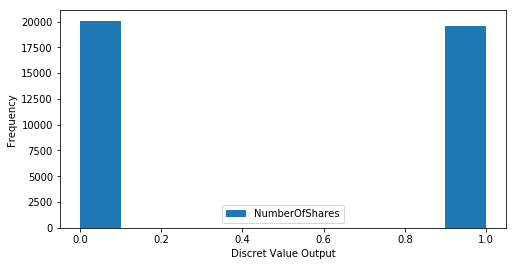

In [37]:
plt.figure(figsize=(8,4))
data['NumberOfShares'].plot.hist(bins=10)
plt.legend()
plt.xlabel('Number Of Shares')
plt.xlabel('Discret Value Output')

### Data Sampling

In [16]:
X = data.drop([' shares', 'NumberOfShares', 'url', ' timedelta'], axis=1)

In [17]:
y = data['NumberOfShares']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Logistic Regression

#### Applying logistic regression without cleaning up the data, so that, later I want to compare impact of cleaning up the data

In [41]:
log_model = LogisticRegression()

In [42]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
predictions = log_model.predict(X_test)

In [44]:
print('Classification Report', classification_report(y_test,predictions))
print('Confusion Matrix', confusion_matrix(y_test,predictions))
print('Accuracy Score', accuracy_score(y_test,predictions))
print('Mean Square Error', mean_squared_error(y_test,predictions))

Classification Report              precision    recall  f1-score   support

          0       0.60      0.65      0.62      6080
          1       0.60      0.54      0.57      5814

avg / total       0.60      0.60      0.60     11894

Confusion Matrix [[3939 2141]
 [2655 3159]]
Accuracy Score 0.596771481419203
Mean Square Error 0.40322851858079706


### We can see that accuracy without cleaning data using logistic regression model is 59%

### Logistic Regression - Using Weekend Data Only

In [45]:
data_weekday = data.iloc[:,38:39]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data_weekday, y, test_size=0.30)

In [47]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
predict = log_model.predict(X_test)

In [49]:
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))
print(accuracy_score(y_test,predict))
print(mean_squared_error(y_test,predict))

             precision    recall  f1-score   support

          0       0.54      0.92      0.68      6038
          1       0.69      0.19      0.29      5856

avg / total       0.61      0.56      0.49     11894

[[5550  488]
 [4763 1093]]
0.5585168992769464
0.44148310072305363


### Accuracy using only weekend data is 54%

### Logistic Regression Using Weekdays Data

In [50]:
data_weekdays = data.iloc[:,31:37]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data_weekdays, y, test_size=0.30)

In [52]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
y_predict = log_model.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(mean_squared_error(y_test,y_predict))

### Accuracy using Weekdays Data is 55%

### Data Cleanup

#### Removing outliers based on n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens

In [19]:
data = data[data[' n_unique_tokens'] <= 1] 
data = data[data[' n_non_stop_words'] <= 1]
data = data[data[' n_non_stop_unique_tokens'] <= 1]

#### Remove rate_positive_words and rate_negative_words which are equal to zero

In [20]:
data = data[data[' rate_positive_words'] + data[' rate_negative_words'] != 0]

#### Remove average token length encoded as zero

In [21]:
data = data[data[' average_token_length'] != 0]

#### Remove other redundant columns

In [22]:
data_week = data.iloc[:, 31:37]

In [23]:
data1 = data.drop(data.iloc[:, 31:37], axis=1)

In [24]:
data1.shape

(38458, 56)

### Resampling the data

In [25]:
X_new = data1.drop(['url', ' shares', 'NumberOfShares', ' timedelta'], axis=1)

In [26]:
y_new = data1['NumberOfShares']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.30)

In [28]:
X_new.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


### Logistic Regression - All 52 Predictors

In [30]:
log_model = LogisticRegression()

In [31]:
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_predict = log_model.predict(X_test)

In [33]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(mean_squared_error(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.59      0.67      0.63      5850
          1       0.60      0.52      0.56      5688

avg / total       0.60      0.60      0.59     11538

[[3902 1948]
 [2714 2974]]
0.5959438377535101
0.4040561622464899


### Accuracy of logistic model after cleaning up data is 60%

### ROC Curve - Logistic Regression

In [34]:
y_pred_prob = log_model.predict_proba(X_test)[:,1]

In [35]:
from sklearn.metrics import roc_curve, auc, log_loss
[fpr, tpr, thr] = roc_curve(y_test, y_pred_prob)

log_loss
0.6668085072342866


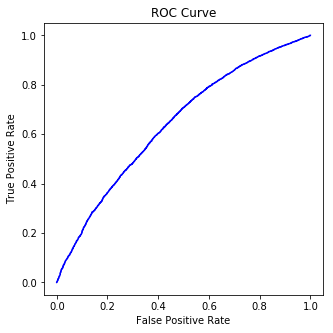

In [36]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', label = 'ROC Curve (area = %0.3f)' % auc(fpr,tpr))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('log_loss')
print(log_loss(y_test, y_pred_prob))

### Hyperparameter tunning and cross validation using GridSearch

In [37]:
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20]}

In [38]:
clf = GridSearchCV(log_model, param, cv=5, scoring='roc_auc')

In [39]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 2, 3, 3, 4, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [40]:
print('Best Estimator')
print(clf.best_estimator_)
print('Best Score')
print(clf.best_score_)
print('Best Parameter')
print(clf.best_params_)

Best Estimator
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Best Score
0.6422220458274126
Best Parameter
{'C': 0.1}


### Accuracy acheived after hyperparameter tunning and cross validation using GridSearch is 64%

In [43]:
y_pred= clf.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test))

0.5904836193447738


### Lasso, Rigid Regularization

In [77]:
for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__,
                      cross_val_score(model, X_new, y_new).mean()))

Ridge: -0.1570146518772182
Lasso: 0.046266327378599


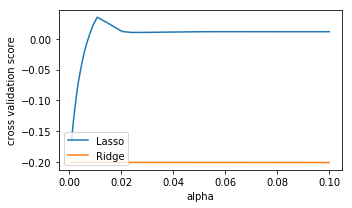

In [78]:
alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X_new, y_new, cv=5).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

### Support Vector Machine - All 52 Predictors

In [133]:
svc_model_1 = SVC(kernel='linear', C=0.001, gamma=1)

In [134]:
svc_model_1.fit(X_train, y_train)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [135]:
y_predict = svc_model_1.predict(X_test)

In [136]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.59      0.72      0.65      5869
          1       0.62      0.48      0.54      5669

avg / total       0.61      0.60      0.60     11538

[[4223 1646]
 [2952 2717]]
0.6014907262957185
0.3985092737042815


### Accuracy of Support Vector Machine model using Kernel as linear, C=1 and gamma = 1 is 60%

### Support Vector Machine - Hyperparameter tuning and Cross Validation

In [140]:
tuned_parameters = {'C' : [0.001]}

In [ ]:
grid_svm = GridSearchCV(svc_model_1, tuned_parameters,cv=5,scoring='accuracy')
grid_svm.fit(X_train, y_train)
print(grid_svm.best_score_)
print(grid_svm.best_params_)
y_pred= grid_svm.predict(X_test)

### Random Forest - All 52 Predictors

In [44]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
y_predict = rfc.predict(X_test)

In [46]:
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(mean_squared_error(y_test,y_predict))

             precision    recall  f1-score   support

          0       0.67      0.68      0.67      5850
          1       0.66      0.66      0.66      5688

avg / total       0.67      0.67      0.67     11538

[[3958 1892]
 [1962 3726]]
0.6659733055988907
0.3340266944011094


### Accuracy achieved using Random Forest us 67%

### ROC Curve - Random Forest

In [47]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]

log_loss
0.6094971246988362


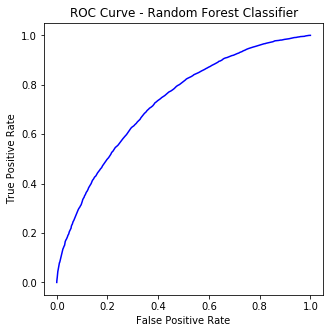

In [48]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', label = 'ROC Curve (area = %0.3f)' % auc(fpr,tpr))
plt.title('ROC Curve - Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('log_loss')
print(log_loss(y_test, y_pred_prob))

### Random Forest - Hyperparameter Tuning and Cross Validation

In [49]:
tuned_parameters = {'n_estimators':[100,400,600]}
grid_rf = GridSearchCV(rfc, tuned_parameters,cv=5,scoring='accuracy')

In [50]:
grid_rf.fit(X_train, y_train)
print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.6683878157503714
{'n_estimators': 600}


In [51]:
y_pred= grid_rf.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.6687467498699948


### Accuracy of model achieved after performing hyperparameter tuning and cross validation is 67%

### Naive Bayes - Top 52 Predictors

In [53]:
naive_model = BernoulliNB().fit(X_train, y_train)

In [54]:
predict_naive = naive_model.predict(X_test)

In [55]:
print(confusion_matrix(y_test,predict_naive))
print(classification_report(y_test, predict_naive))
print(accuracy_score(y_test, predict_naive))
print(mean_squared_error(y_test,predict_naive))

[[3756 2094]
 [2284 3404]]
             precision    recall  f1-score   support

          0       0.62      0.64      0.63      5850
          1       0.62      0.60      0.61      5688

avg / total       0.62      0.62      0.62     11538

0.6205581556595597
0.37944184434044026


### Accuracy achieved by applying Naive Bayes algorithm is 61%

### ROC Curve - Naive Bayes Algorithm

In [56]:
y_pred_prob = naive_model.predict_proba(X_test)[:,1]

log_loss
0.6601227825957526


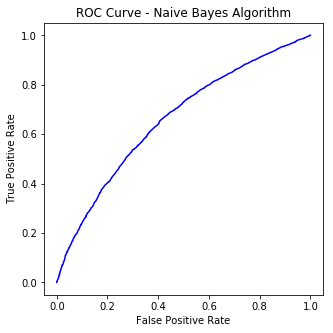

In [57]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', label = 'ROC Curve (area = %0.3f)' % auc(fpr,tpr))
plt.title('ROC Curve - Naive Bayes Algorithm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('log_loss')
print(log_loss(y_test, y_pred_prob))

### Naive Bayes - Hyperparameter tuning and Cross Validation

In [58]:
tuned_parameters = { 'alpha' : (0.001, 0.01, 0.1, 1)}

In [59]:
model_naiv = GridSearchCV(naive_model, tuned_parameters,cv=5,scoring='accuracy')

In [60]:
model_naiv.fit(X_train, y_train)
print('Best Score:')
print(model_naiv.best_score_)
print("Best Parameter:")
print(model_naiv.best_params_)
print('Accuracy_Score')
y_pred= model_naiv.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

Best Score:
0.6070208023774145
Best Parameter:
{'alpha': 0.001}
Accuracy_Score
0.6203848153926157


### Accuracy achieved after hyperparameter tuning and cross validation on naive bayes algorithm is 61%

### Neural Network - All 52 Predictors

In [69]:
clf = MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(3000,))

In [70]:
clf.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3000,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [71]:
predict = clf.predict(X_test)

In [72]:
print(confusion_matrix(y_test,predict))
print(classification_report(y_test, predict))
print(accuracy_score(y_test, predict))

[[5769   81]
 [5506  182]]
             precision    recall  f1-score   support

          0       0.51      0.99      0.67      5850
          1       0.69      0.03      0.06      5688

avg / total       0.60      0.52      0.37     11538

0.515773964291905


### Accuracy achieved used neural network model is 51%

In [73]:
y_pred_prob = clf.predict_proba(X_test)[:,1]

log_loss
0.692727876064385


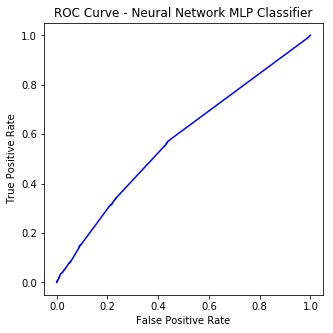

In [75]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='blue', label = 'ROC Curve (area = %0.3f)' % auc(fpr,tpr))
plt.title('ROC Curve - Neural Network MLP Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print('log_loss')
print(log_loss(y_test, y_pred_prob))

### Hyperparameter tuning and Cross Validation - Neural Networks - MLPClassifier

In [96]:
tuned_parameters = { 'activation': ['relu'], 'solver':['adam'], 'learning_rate':['adaptive'], 'batch_size' :[1000] }

In [97]:
model_mlp = GridSearchCV(clf, tuned_parameters,cv=5,scoring='accuracy')

In [99]:
model_mlp.fit(X_train, y_train)
print('Best Score')
print(model_mlp.best_score_)
print('Best Parameter')
print(model_mlp.best_params_)
y_pred= model_mlp.predict(X_test)
print('Accuracy Score')
print(metrics.accuracy_score(y_pred,y_test))

Best Score
0.5098439821693908
Best Parameter
{'activation': 'relu', 'batch_size': 1000, 'learning_rate': 'adaptive', 'solver': 'adam'}
Accuracy Score
0.5218408736349454


### Accuracy of MLPClassifier after hyperparameter tuning and cross validation is 52%

### Results and Conclusion

#### I have applied five machine learning algorithms in my dataset. I also did in depth analysis on each algorithm by performing hyperparameter tuning and cross validation. First algorithm which I used for my analysis is logistic regression which give a descent accuracy of 60%. After performing hyperparameter tuning and cross validation, accuracy of model is increased to 64%.

#### Support Vector Machine with kernel as linear, regularization as 0.001 and gamma as 1 gave an accuracy of 60%. After performing hyperparameter tuning and cross validation, accuracy achieved is 61%.

#### Random Forest Classifier using 400 trees give the highest accuracy of 67%. After performing, hyperparameter tuning and cross validation, algorithm give an accuracy of same 67% only.

#### Naïve Bayes algorithm give an accuracy of 61%. After performing, hyperparameter tuning and cross validation, algorithm gave same accuracy of 61% 

#### Using Neural Networks, Single Layer Perceptron gave an accuracy of 58%. However, using 10000 epochs gave an accuracy of 64%.

#### Using Neural Networks, Multi Layer Perceptron gave an accuracy of 53% at step 0 and 58% at step 10000

### Results Summary

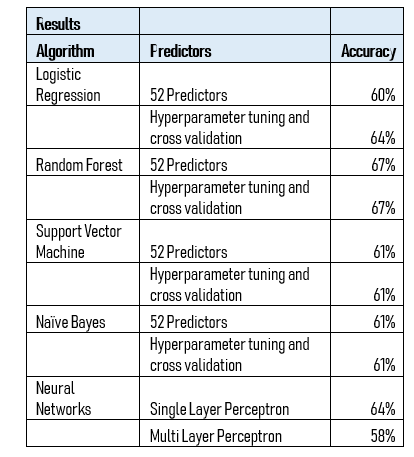

In [2]:
from IPython.display import Image
Image(filename='Results.PNG')

### References

http://www-scf.usc.edu/~jiayingg/

https://www.programcreek.com

https://ieeexplore.ieee.org/document/7802890

http://cs229.stanford.edu/proj2015/328_report.pdf

https://www.linkedin.com/pulse/online-news-popularity-trend-analysis-krunal-khatri/

http://inseaddataanalytics.github.io/INSEADAnalytics/groupprojects/January2017/MashableNews.html

https://github.com/nikbearbrown/INFO_7390/tree/master/Projects/Research_Papers

http://cs229.stanford.edu/proj2016/report/GengYuanWang-PredictingPopularityOfPostsOnHackerNews-report.pdf

http://cs229.stanford.edu/proj2016/report/JohnsonWeinberger-PredictingNewsSharing-report.pdf

http://cs229.stanford.edu/proj2015/328_report.pdf



P.S Note - Code for Neural Network - Single layer Perceptron and Multi Layer Perceptron is in another Jupyter Notebook - 
Link is Below - 
https://github.com/chitraparyani/Machine-Learning/blob/master/Project%20Code%20-%20Online_News_Popularity_Prediction%20Neural%20Network.ipynb